In [1]:
import zipfile
import os
import numpy as np

In [9]:
with zipfile.ZipFile('/content/archive_alfy.zip','r') as zip_ref:
     zip_ref.extractall()

In [13]:
for dirpath, dirnames, filenames in os.walk('/content/HGR dataset'):
    print( f" There are {len(dirnames)} directories and {len(dirnames)} in '{dirpath}'." )


 There are 2 directories and 2 in '/content/HGR dataset'.
 There are 4 directories and 4 in '/content/HGR dataset/train'.
 There are 0 directories and 0 in '/content/HGR dataset/train/Y'.
 There are 0 directories and 0 in '/content/HGR dataset/train/A'.
 There are 0 directories and 0 in '/content/HGR dataset/train/L'.
 There are 0 directories and 0 in '/content/HGR dataset/train/F'.
 There are 4 directories and 4 in '/content/HGR dataset/multi_user_test'.
 There are 0 directories and 0 in '/content/HGR dataset/multi_user_test/Y'.
 There are 0 directories and 0 in '/content/HGR dataset/multi_user_test/A'.
 There are 0 directories and 0 in '/content/HGR dataset/multi_user_test/L'.
 There are 0 directories and 0 in '/content/HGR dataset/multi_user_test/F'.


In [8]:
# import shutil
# shutil.rmtree('/content/Sign Language for Numbers/6')
# shutil.rmtree('/content/Sign Language for Numbers/7')
# shutil.rmtree('/content/Sign Language for Numbers/8')
# shutil.rmtree('/content/Sign Language for Numbers/9')
# shutil.rmtree('/content/Sign Language for Numbers/unknown')
# rmtree() funksiyası (recursive remove tree)

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
import random
def random_image(target_dir, target_class):
    target_folder=pathlib.Path(target_dir)/target_class
    random_image=random.choice(os.listdir(target_folder))
    img=mpimg.imread(target_folder/random_image)
    plt.imshow(img, cmap='rgb')
    plt.axis('off')

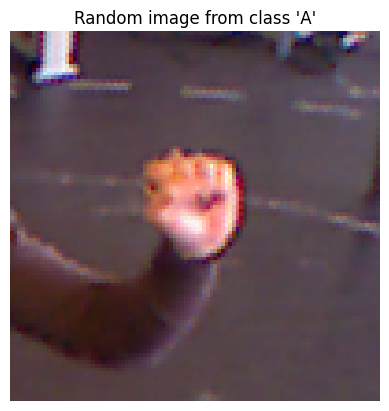

In [23]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Parametrlər
target_dir = '/content/HGR dataset/multi_user_test'
target_class = 'A'

# Yolun tam halını qur
class_path = os.path.join(target_dir, target_class)

# Bütün şəkilləri yığ
image_files = os.listdir(class_path)

# Təsadüfi bir şəkil seç
random_image_name = random.choice(image_files)
random_image_path = os.path.join(class_path, random_image_name)

# Şəkli aç və göstər
image = Image.open(random_image_path)
plt.imshow(image)
plt.title(f"Random image from class '{target_class}'")
plt.axis('off')
plt.show()


In [25]:
import tensorflow as tf
IMG_SIZE=(224,224)
test_dir='/content/HGR dataset/multi_user_test'
train_dir='/content/HGR dataset/train'

train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               subset='training',
                                                               image_size=IMG_SIZE,
                                                               seed=42,
                                                              #  color_mode='grayscale',
                                                               validation_split=0.2,
                                                               label_mode='categorical',
                                                               crop_to_aspect_ratio=True
                                                               )
test_data=tf.keras.preprocessing.image_dataset_from_directory( test_dir,
                                                               subset='training',
                                                               seed=42,
                                                              #  color_mode='grayscale',
                                                               image_size=IMG_SIZE,
                                                               validation_split=0.2,
                                                               label_mode='categorical',
                                                               crop_to_aspect_ratio=True)

Found 24611 files belonging to 4 classes.
Using 19689 files for training.
Found 17052 files belonging to 4 classes.
Using 13642 files for training.


In [ ]:
import tensorflow as tf
train_dir='/content/HGR dataset/train'
test_dir='/content/HGR dataset/multi_user_test'
IMG_SIZE=(224,224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=42,
    image_size=IMG_SIZE,
    batch_size=32,
    label_mode='categorical'
)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=IMG_SIZE,
    batch_size=32,
    label_mode='categorical'
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    subset='training',
    validation_split=0.2,
    seed=42,
    image_size=IMG_SIZE,
    batch_size=32,
    label_mode='categorical'
)

Found 24611 files belonging to 4 classes.
Found 17052 files belonging to 4 classes.
Using 3410 files for validation.
Found 17052 files belonging to 4 classes.
Using 13642 files for training.


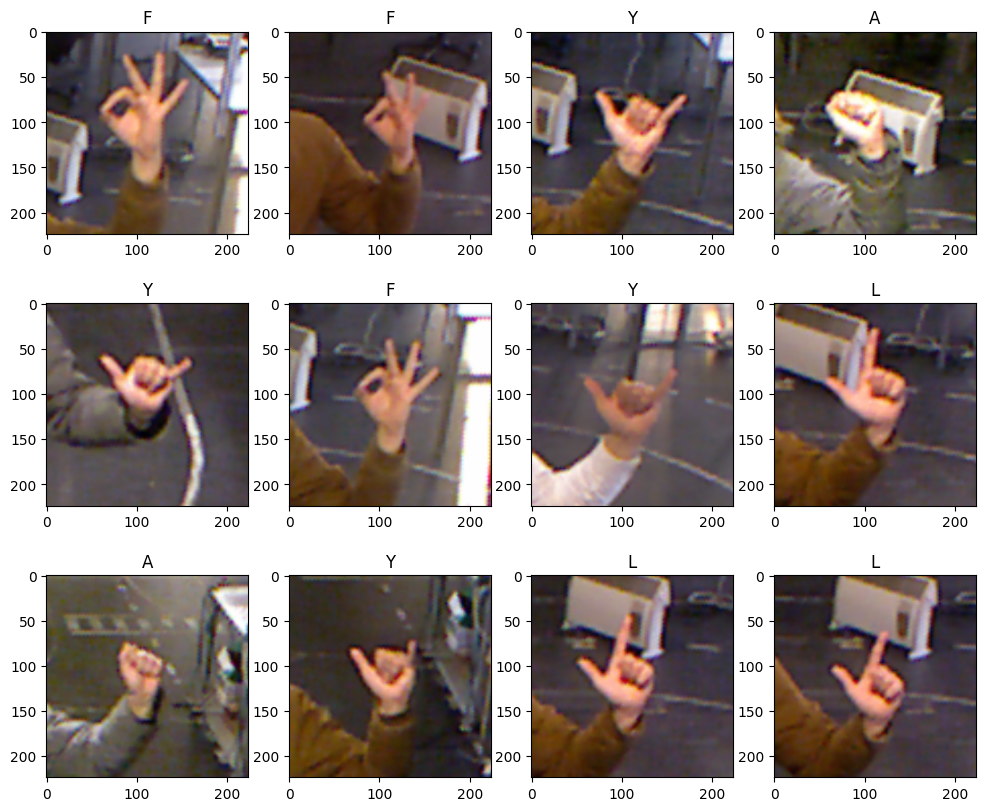

In [ ]:
 import matplotlib.pyplot as plt
 plt.figure(figsize=(12,10))
 class_names=train_data.class_names
 for image, label in train_data.take(1):
    for i in range(12):
        ax=plt.subplot(3,4, i+1)
        plt.imshow(image[i]/255)
        plt.title(class_names[np.argmax(label[i].numpy())])


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),

    tf.keras.layers.Rescaling(1/255.),

    tf.keras.layers.Conv2D(64, kernel_size=7, strides=3, activation='relu',
                           padding='same',kernel_initializer='he_normal'),

    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, kernel_size=3, padding='same', activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(128, kernel_size=3, padding='same', activation='relu',
                           kernel_initializer='he_normal'),

    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', activation='relu',
                           kernel_initializer='he_normal'),

    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 75, 75, 64)     │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,779,012 (14.42 MB)

 Trainable params: 3,779,012 (14.42 MB)

 Non-trainable params: 0 (0.00 B)

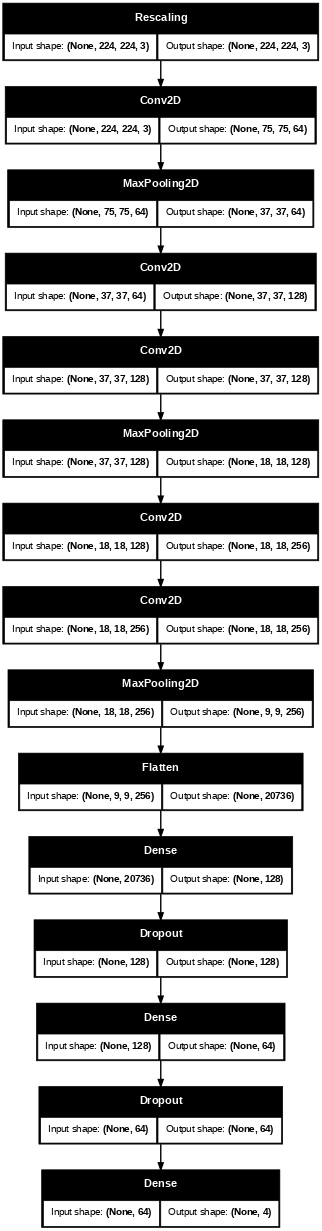

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True, dpi=50)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 25.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


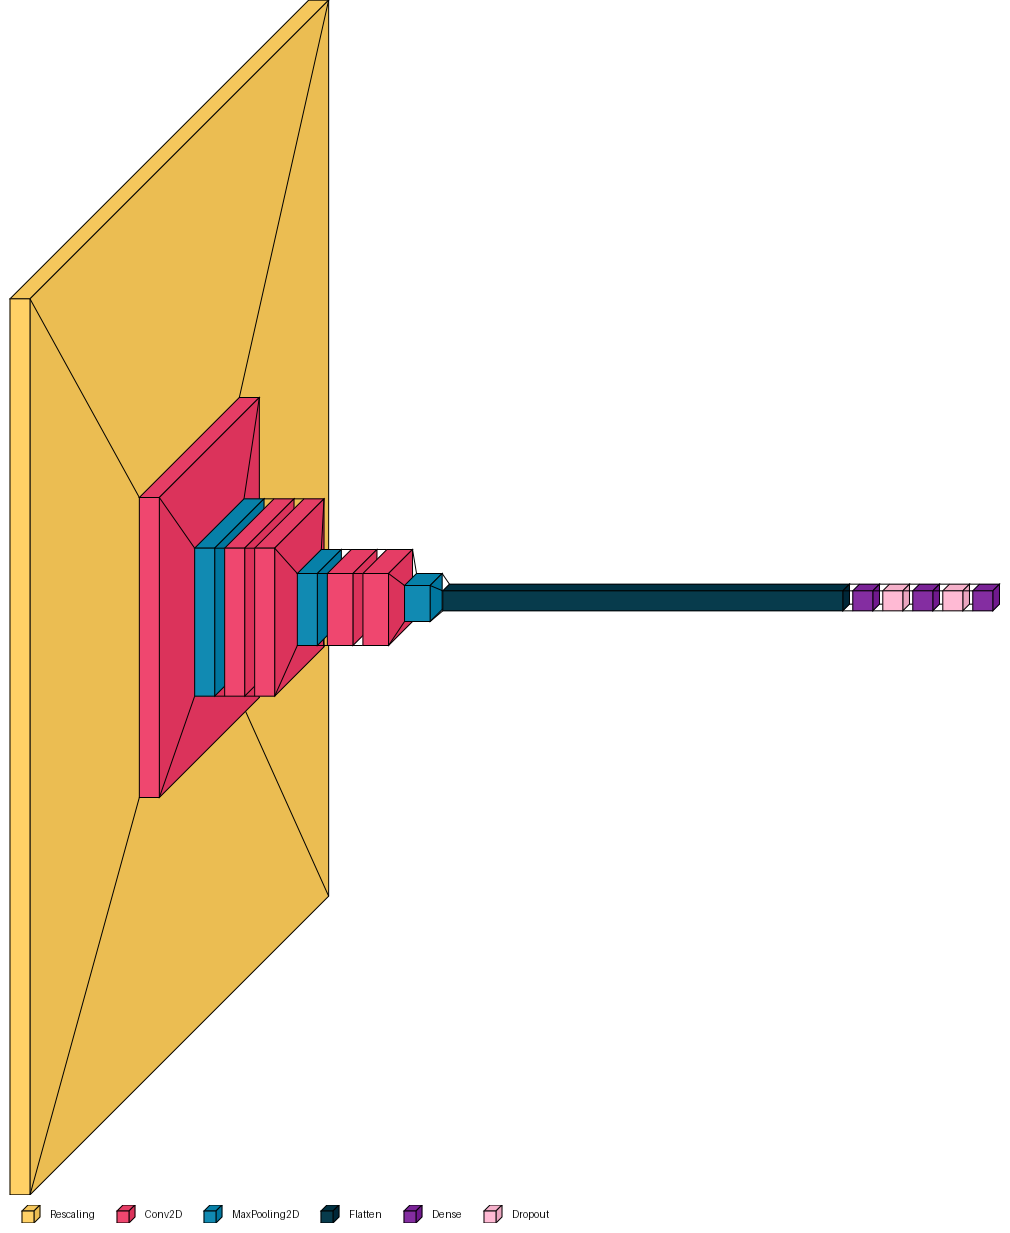

In [ ]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True)

In [ ]:
model.compile(optimizer='adam', metrics=['accuracy'],
              loss='categorical_crossentropy')
history=model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
770/770 ━━━━━━━━━━━━━━━━━━━━ 47s 44ms/step - accuracy: 0.6385 - loss: 0.7848 - val_accuracy: 0.7739 - val_loss: 0.9532
Epoch 2/20
770/770 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.9797 - loss: 0.0716 - val_accuracy: 0.7985 - val_loss: 1.6715
Epoch 3/20
770/770 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9884 - loss: 0.0463 - val_accuracy: 0.7419 - val_loss: 0.9575
Epoch 4/20
770/770 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9847 - loss: 0.0657 - val_accuracy: 0.8378 - val_loss: 1.0994
Epoch 5/20
770/770 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.9930 - loss: 0.0225 - val_accuracy: 0.8519 - val_loss: 1.1075
Epoch 6/20
770/770 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.9934 - loss: 0.0201 - val_accuracy: 0.8531 - val_loss: 1.0774
Epoch 7/20
770/770 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9943 - loss: 0.0176 - val_accuracy: 0.8428 - val_loss: 1.6739
Epoch 8/20
770/770 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.9920 - loss: 0.0424 - 

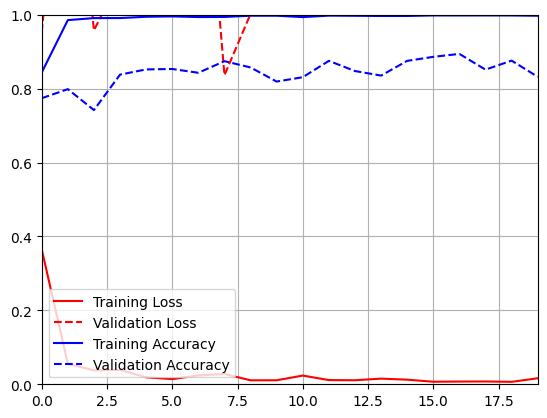

In [ ]:
x
plt.legend(loc='lower left')
plt.show()

In [ ]:
model_file='Sign Language for Numbers'
zip_file='hand_detect.zip'
with zipfile.ZipFile(zip_file,'w', zipfile.ZIP_DEFLATED) as zipf:
  zipf.write(model_file, arcname='hand_detect.keras')

In [ ]:
model.save("hand_model5.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


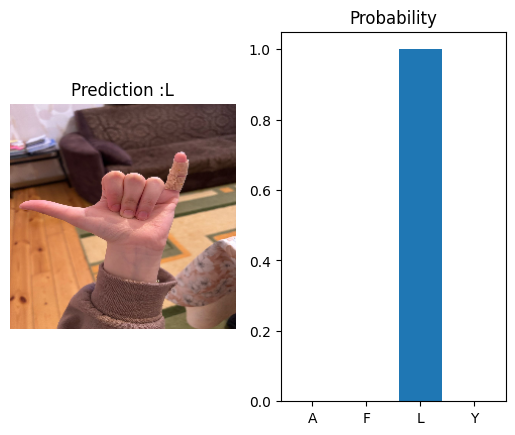

In [ ]:
def pred_and_plot(model, image_path):
    img=mpimg.imread(image_path)
    img=tf.image.resize(img,size=[224,224])
    img=img[tf.newaxis,...]
    pred=model.predict(img)
    plt.subplot(1,2,1)
    plt.imshow(img[0]/255)
    plt.title(f'Prediction :{class_names[np.argmax(pred)]}')
    plt.axis(False)
    plt.subplot(1,2,2)
    plt.bar(class_names, pred[0])
    plt.title('Probability')
    plt.show()
pred_and_plot(model,'/content/WhatsApp Image 2025-04-14 at 22.58.44.jpeg')

In [ ]:
base_model=tf.keras.applications.ResNet50(include_top=False)
avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output=tf.keras.layers.Dense(units=4, activation='softmax')(avg)
model=tf.keras.Model(inputs=base_model.input, outputs=output)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable=True

In [ ]:
initial_learning_rate=0.01
lr=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=47,
    decay_rate=0.96
)

ealy_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=3,
                                              restore_best_weights=True)
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
model.fit(train_data,
          validation_data=validation_data,
          callbacks=[ealy_stopping],
          epochs=15 )

Epoch 1/15
770/770 ━━━━━━━━━━━━━━━━━━━━ 319s 347ms/step - accuracy: 0.9901 - loss: 0.0376 - val_accuracy: 0.6701 - val_loss: 3.0732
Epoch 2/15
770/770 ━━━━━━━━━━━━━━━━━━━━ 271s 305ms/step - accuracy: 0.9963 - loss: 0.0146 - val_accuracy: 0.7120 - val_loss: 1.7293
Epoch 3/15
770/770 ━━━━━━━━━━━━━━━━━━━━ 235s 306ms/step - accuracy: 0.9849 - loss: 0.0579 - val_accuracy: 0.5598 - val_loss: 1.7085
Epoch 4/15
770/770 ━━━━━━━━━━━━━━━━━━━━ 261s 304ms/step - accuracy: 0.9826 - loss: 0.0667 - val_accuracy: 0.5343 - val_loss: 1.9817
Epoch 5/15
770/770 ━━━━━━━━━━━━━━━━━━━━ 262s 303ms/step - accuracy: 0.9990 - loss: 0.0034 - val_accuracy: 0.6126 - val_loss: 3.0653
Epoch 6/15
770/770 ━━━━━━━━━━━━━━━━━━━━ 264s 306ms/step - accuracy: 0.9986 - loss: 0.0054 - val_accuracy: 0.6988 - val_loss: 1.1142
Epoch 7/15
770/770 ━━━━━━━━━━━━━━━━━━━━ 260s 304ms/step - accuracy: 0.9880 - loss: 0.0618 - val_accuracy: 0.6504 - val_loss: 2.6135
Epoch 8/15
 85/770 ━━━━━━━━━━━━━━━━━━━━ 3:21 294ms/step - accuracy: 0.9998 -

KeyboardInterrupt: 